## Notebook04a

### Setup

Run all of the following before starting the notebook.

In [3]:
! wget -q -nc https://raw.githubusercontent.com/taylor-arnold/fds-py/refs/heads/main/funs.py

In [4]:
import numpy as np
import polars as pl

from funs import *
from plotnine import *
from polars import col as c
theme_set(theme_minimal())

ub = "https://raw.githubusercontent.com/taylor-arnold/fds-py-nb/refs/heads/main/"

In [5]:
movie = pl.read_csv(ub + "data/movies_50_years.csv")
color = pl.read_csv(ub + "data/movies_50_years_color.csv")
genre = pl.read_csv(ub + "data/movies_50_years_genre.csv")
people = pl.read_csv(ub + "data/movies_50_years_people.csv")

movie

year,title,mpa,runtime,gross,rating_count,rating,metacritic,poster_brightness,poster_saturation,poster_edgeness,description
i64,str,str,i64,f64,i64,f64,i64,f64,f64,f64,str
1970,"""Love Story""","""PG""",100,106.4,28330,6.9,null,79.039734,8.029792,4.586166,"""A boy and a girl from differen…"
1970,"""Airport""","""G""",137,100.49,16512,6.6,42,70.73516,29.284572,4.954735,"""A bomber on board an airplane,…"
1970,"""MASH""","""R""",116,81.6,64989,7.5,null,74.540002,40.103629,3.510285,"""The staff of a Korean War fiel…"
1970,"""Patton""","""GP""",172,61.7,90461,7.9,null,83.128991,17.43385,3.657574,"""The World War II phase of the …"
1970,"""The AristoCats""","""G""",78,37.68,87551,7.1,null,79.794746,12.481992,4.400358,"""With the help of a smooth talk…"
…,…,…,…,…,…,…,…,…,…,…,…
2019,"""The Art of Self-Defense""","""R""",104,2.41,18474,6.7,null,45.466534,67.429893,3.232832,"""After being attacked on the st…"
2019,"""Luce""","""R""",109,1.78,5800,6.8,null,76.585779,5.941685,2.307601,"""A married couple is forced to …"
2019,"""The Other Side of Heaven 2: Fi…","""PG-13""",117,1.72,259,5.1,null,57.68667,39.572749,2.307937,"""Missionary John H. Groberg ret…"


In [6]:
color

year,title,color_type,color,percentage
i64,str,str,str,f64
1970,"""Love Story""","""hue""","""red""",2.635655
1970,"""Love Story""","""hue""","""orange""",3.093356
1970,"""Love Story""","""hue""","""yellow""",0.054209
1970,"""Love Story""","""hue""","""green""",0.236061
1970,"""Love Story""","""hue""","""blue""",0.319376
…,…,…,…,…
2019,"""The Kid""","""hue""","""violet""",0.000035
2019,"""The Kid""","""greyscale""","""black""",45.555829
2019,"""The Kid""","""greyscale""","""grey""",27.530377


In [7]:
genre

year,title,genre
i64,str,str
1970,"""Love Story""","""Drama"""
1970,"""Love Story""","""Romance"""
1970,"""Airport""","""Action"""
1970,"""Airport""","""Drama"""
1970,"""Airport""","""Thriller"""
…,…,…
2019,"""The Aftermath""","""Romance"""
2019,"""The Aftermath""","""War"""
2019,"""The Kid""","""Biography"""


In [8]:
people

year,title,role,rank,person,gender,gender_conf
i64,str,str,i64,str,str,f64
1970,"""Love Story""","""director""",1,"""Arthur Hiller""","""male""",0.9937
1970,"""Love Story""","""starring""",1,"""Ali MacGraw""","""male""",0.6877
1970,"""Love Story""","""starring""",2,"""Ryan O'Neal""","""male""",0.9768
1970,"""Love Story""","""starring""",3,"""John Marley""","""male""",0.9961
1970,"""Love Story""","""starring""",4,"""Ray Milland""","""male""",0.984
…,…,…,…,…,…,…
2019,"""The Kid""","""director""",1,"""Vincent D'Onofrio""","""male""",0.9956
2019,"""The Kid""","""starring""",1,"""Jake Schur""","""male""",0.9979
2019,"""The Kid""","""starring""",2,"""Leila George""","""female""",0.9998


### Questions

In this notebook, we will learn how to combine information from multiple datasets using joins. The movie data has been split into several tables: `movie` contains basic information about each film (runtime, rating, etc.), `genre` lists the genres associated with each film, `color` contains information about the colors in each movie's poster, and `people` has information about the cast and crew. Because some movie titles are duplicated across different years, we will always join by both year and title to ensure we match records correctly.

Create a new column in the `movie` dataset that computes the ratio of the number of ratings to the runtime. This gives a rough sense of audience engagement per minute of film.

In [9]:
(
    movie
    .with_columns(aud_eng_pm = (c.rating / c.runtime))
)

year,title,mpa,runtime,gross,rating_count,rating,metacritic,poster_brightness,poster_saturation,poster_edgeness,description,aud_eng_pm
i64,str,str,i64,f64,i64,f64,i64,f64,f64,f64,str,f64
1970,"""Love Story""","""PG""",100,106.4,28330,6.9,null,79.039734,8.029792,4.586166,"""A boy and a girl from differen…",0.069
1970,"""Airport""","""G""",137,100.49,16512,6.6,42,70.73516,29.284572,4.954735,"""A bomber on board an airplane,…",0.048175
1970,"""MASH""","""R""",116,81.6,64989,7.5,null,74.540002,40.103629,3.510285,"""The staff of a Korean War fiel…",0.064655
1970,"""Patton""","""GP""",172,61.7,90461,7.9,null,83.128991,17.43385,3.657574,"""The World War II phase of the …",0.04593
1970,"""The AristoCats""","""G""",78,37.68,87551,7.1,null,79.794746,12.481992,4.400358,"""With the help of a smooth talk…",0.091026
…,…,…,…,…,…,…,…,…,…,…,…,…
2019,"""The Art of Self-Defense""","""R""",104,2.41,18474,6.7,null,45.466534,67.429893,3.232832,"""After being attacked on the st…",0.064423
2019,"""Luce""","""R""",109,1.78,5800,6.8,null,76.585779,5.941685,2.307601,"""A married couple is forced to …",0.062385
2019,"""The Other Side of Heaven 2: Fi…","""PG-13""",117,1.72,259,5.1,null,57.68667,39.572749,2.307937,"""Missionary John H. Groberg ret…",0.04359


Using the `movie` dataset, create a scatter plot with runtime on the x-axis and the IMDB rating on the y-axis.

/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 387 rows containing missing values.


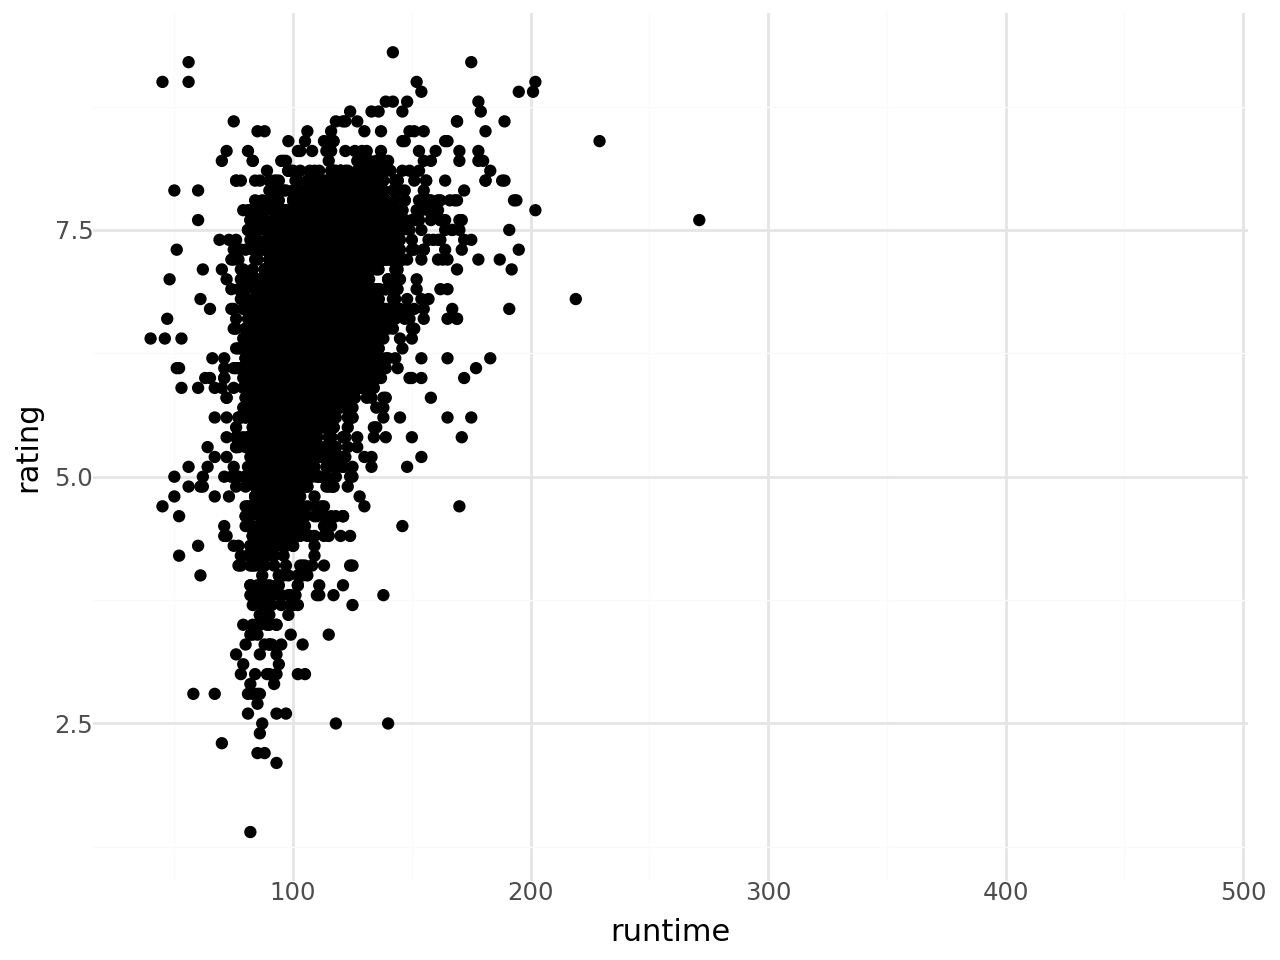

In [10]:
(
    movie
    .pipe(ggplot, aes("runtime", "rating"))
    + geom_point()
)

Create a boxplot showing the distribution of poster brightness for each MPA rating category.

/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 461 rows containing non-finite values.


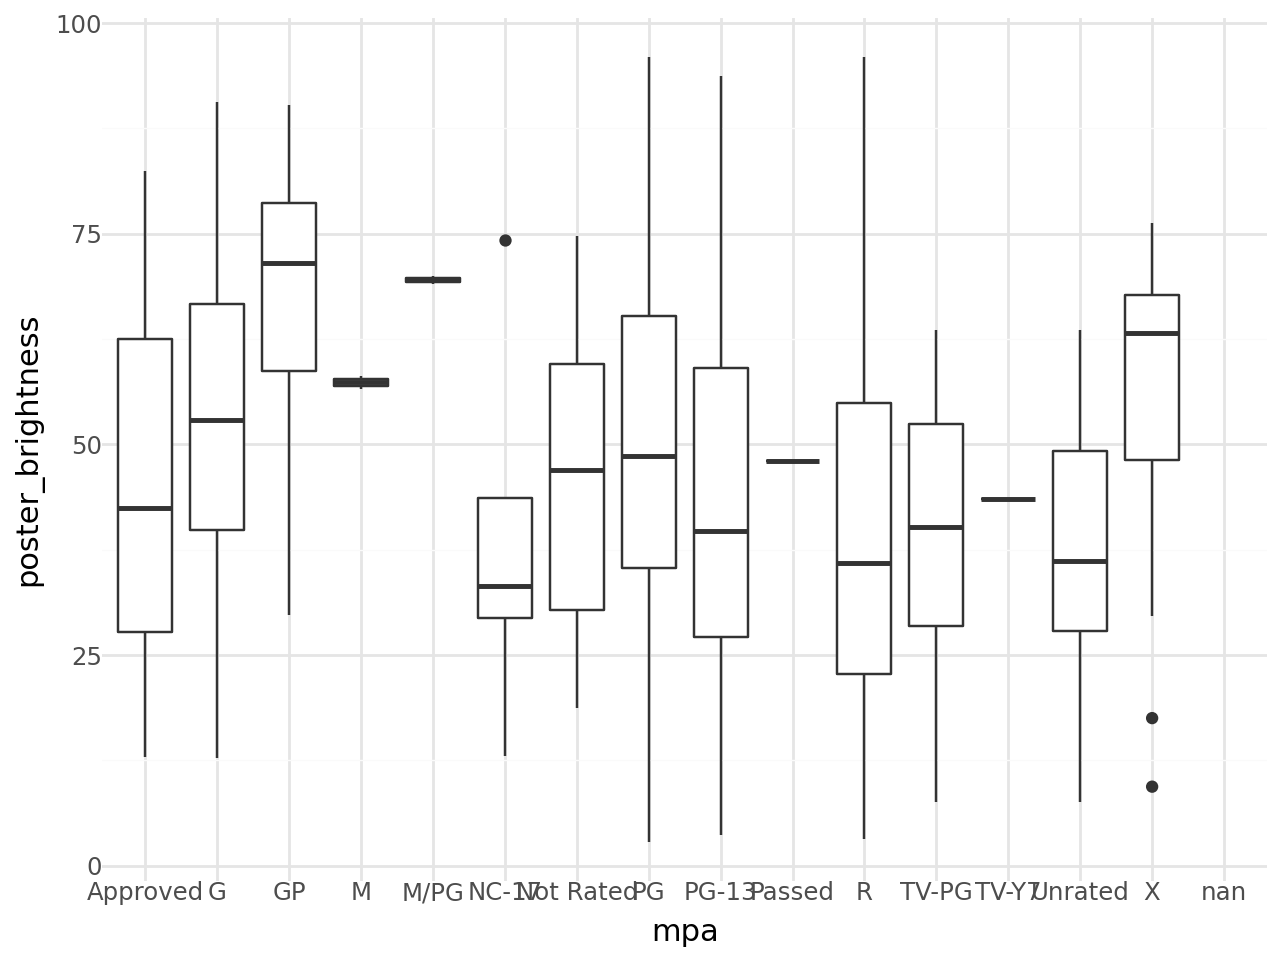

In [11]:
(
    movie
    .pipe(ggplot, aes("mpa", "poster_brightness"))
    + geom_boxplot()
)

Now let's start working with multiple tables. Join the `genre` table to the `movie` table. Remember to join on both year and title since some titles appear in multiple years.

In [12]:
movie_genre = (
    movie
    .join(genre, on=[c.year, c.title])
)
movie_genre

year,title,mpa,runtime,gross,rating_count,rating,metacritic,poster_brightness,poster_saturation,poster_edgeness,description,genre
i64,str,str,i64,f64,i64,f64,i64,f64,f64,f64,str,str
1970,"""Love Story""","""PG""",100,106.4,28330,6.9,null,79.039734,8.029792,4.586166,"""A boy and a girl from differen…","""Drama"""
1970,"""Love Story""","""PG""",100,106.4,28330,6.9,null,79.039734,8.029792,4.586166,"""A boy and a girl from differen…","""Romance"""
1970,"""Airport""","""G""",137,100.49,16512,6.6,42,70.73516,29.284572,4.954735,"""A bomber on board an airplane,…","""Action"""
1970,"""Airport""","""G""",137,100.49,16512,6.6,42,70.73516,29.284572,4.954735,"""A bomber on board an airplane,…","""Drama"""
1970,"""Airport""","""G""",137,100.49,16512,6.6,42,70.73516,29.284572,4.954735,"""A bomber on board an airplane,…","""Thriller"""
…,…,…,…,…,…,…,…,…,…,…,…,…
2019,"""The Aftermath""","""R""",108,1.62,13203,6.3,43,18.4582,36.364627,2.137566,"""Post World War II, a British c…","""Romance"""
2019,"""The Aftermath""","""R""",108,1.62,13203,6.3,43,18.4582,36.364627,2.137566,"""Post World War II, a British c…","""War"""
2019,"""The Kid""","""R""",100,1.51,5210,5.9,51,27.409446,40.325301,3.192685,"""The story of a young boy who w…","""Biography"""


Using the joined data, compute the average poster brightness and average poster saturation for each genre. Then create a scatter plot of these averages with genre labels next to each point.

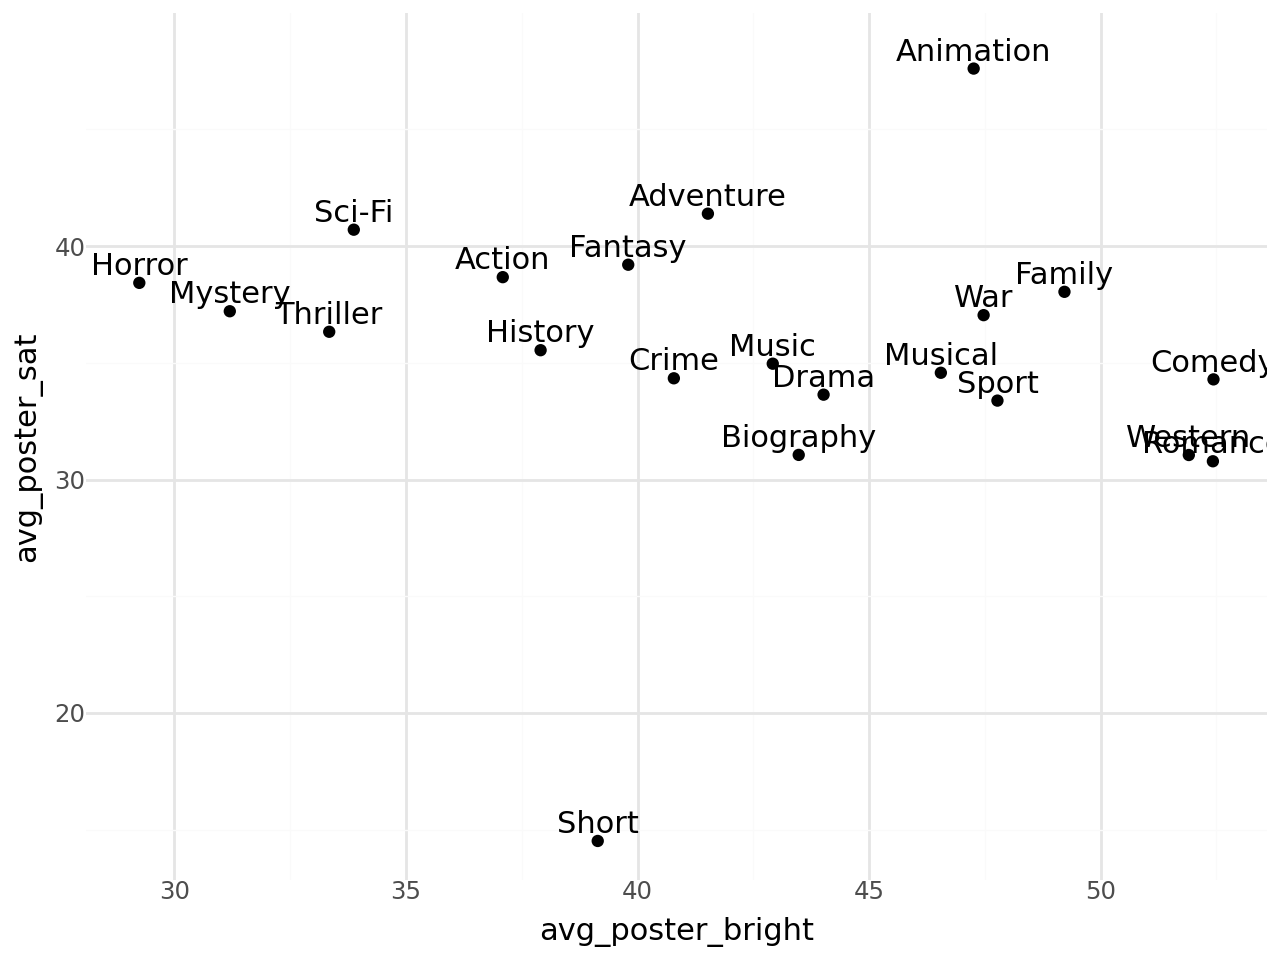

In [13]:
(
    movie_genre
    .group_by(c.genre)
    .agg(
        avg_poster_bright = c.poster_brightness.mean(),
        avg_poster_sat = c.poster_saturation.mean()
    )
    .pipe(ggplot, aes("avg_poster_bright", "avg_poster_sat"))
    + geom_point()
    + geom_text(aes(label = "genre"), nudge_y = 0.7)
)

The `people` table contains information about cast and crew, including a predicted gender and a confidence score for that prediction. Filter the people data to only starring roles where the gender confidence is greater than 0.8. Then join this to the genre table. For each genre, compute the proportion of these roles that are female and the total count. Sort by the proportion of female roles and display all results.

In [14]:
(
    people
    .filter(c.role == "starring")
    .filter(c.gender_conf > 0.8)
    .join(genre, on=[c.title, c.year])
    .group_by(c.genre)
    .agg(
        avg_female = (c.gender == "female").mean(),
        count = pl.len()
    )
    .sort(c.avg_female)
    .pipe(print_rows)
)

genre,avg_female,count
str,f64,u32
"""Short""",0.0,1
"""War""",0.183099,213
"""History""",0.233516,364
"""Western""",0.247059,255
"""Action""",0.267078,4538
"""Crime""",0.284756,3129
"""Adventure""",0.289352,3691
"""Sport""",0.293249,474
"""Biography""",0.297017,771


In [15]:
color

year,title,color_type,color,percentage
i64,str,str,str,f64
1970,"""Love Story""","""hue""","""red""",2.635655
1970,"""Love Story""","""hue""","""orange""",3.093356
1970,"""Love Story""","""hue""","""yellow""",0.054209
1970,"""Love Story""","""hue""","""green""",0.236061
1970,"""Love Story""","""hue""","""blue""",0.319376
…,…,…,…,…
2019,"""The Kid""","""hue""","""violet""",0.000035
2019,"""The Kid""","""greyscale""","""black""",45.555829
2019,"""The Kid""","""greyscale""","""grey""",27.530377


Let's find the most common dominant poster color for each genre. Start with the `color` table and filter to just the hue colors. For each movie, find the color with the highest percentage (this is the dominant hue). Keep only movies where the dominant hue makes up more than 5% of the poster. Join this to the genre table, then count how often each color appears as the dominant hue within each genre. Finally, find the single most common dominant color for each genre.

In [16]:
(
    color
    .filter(c.color_type == "hue")
    .sort(c.percentage, descending=True)
    .group_by([c.title, c.year])
    .head(1)
    .filter(c.percentage > 5)
    .join(genre, on=[c.title,c.year])
    .group_by([c.genre, c.color])
    .agg(
        count = pl.len()
    )
    .sort(c.count, descending=True)
    .group_by(c.genre)
    .head(1)
    .sort(c.count, descending=True)
    .pipe(print_rows)
)

genre,color,count
str,str,u32
"""Comedy""","""red""",1018
"""Drama""","""red""",971
"""Action""","""red""",535
"""Romance""","""red""",436
"""Crime""","""red""",432
"""Adventure""","""blue""",374
"""Thriller""","""red""",294
"""Horror""","""red""",160
"""Family""","""red""",159


In [17]:
movie

year,title,mpa,runtime,gross,rating_count,rating,metacritic,poster_brightness,poster_saturation,poster_edgeness,description
i64,str,str,i64,f64,i64,f64,i64,f64,f64,f64,str
1970,"""Love Story""","""PG""",100,106.4,28330,6.9,null,79.039734,8.029792,4.586166,"""A boy and a girl from differen…"
1970,"""Airport""","""G""",137,100.49,16512,6.6,42,70.73516,29.284572,4.954735,"""A bomber on board an airplane,…"
1970,"""MASH""","""R""",116,81.6,64989,7.5,null,74.540002,40.103629,3.510285,"""The staff of a Korean War fiel…"
1970,"""Patton""","""GP""",172,61.7,90461,7.9,null,83.128991,17.43385,3.657574,"""The World War II phase of the …"
1970,"""The AristoCats""","""G""",78,37.68,87551,7.1,null,79.794746,12.481992,4.400358,"""With the help of a smooth talk…"
…,…,…,…,…,…,…,…,…,…,…,…
2019,"""The Art of Self-Defense""","""R""",104,2.41,18474,6.7,null,45.466534,67.429893,3.232832,"""After being attacked on the st…"
2019,"""Luce""","""R""",109,1.78,5800,6.8,null,76.585779,5.941685,2.307601,"""A married couple is forced to …"
2019,"""The Other Side of Heaven 2: Fi…","""PG-13""",117,1.72,259,5.1,null,57.68667,39.572749,2.307937,"""Missionary John H. Groberg ret…"


Now, let's see an example of how to use an semi-join. First, create a table called `movie_long` that consists of all films that have a run time greater than 2.5 hours (150 minutes).

In [18]:
movie_long = (
    movie
    .filter(c.runtime > 150)
)

Then, draw a plot showing the number films that have a long runtime by their genre using a semi-join. Try to make the plot look nice. Note: Yes, you could do this in other ways in this simple case. Semi- and anti-joins are very useful as our analyses become more complex.

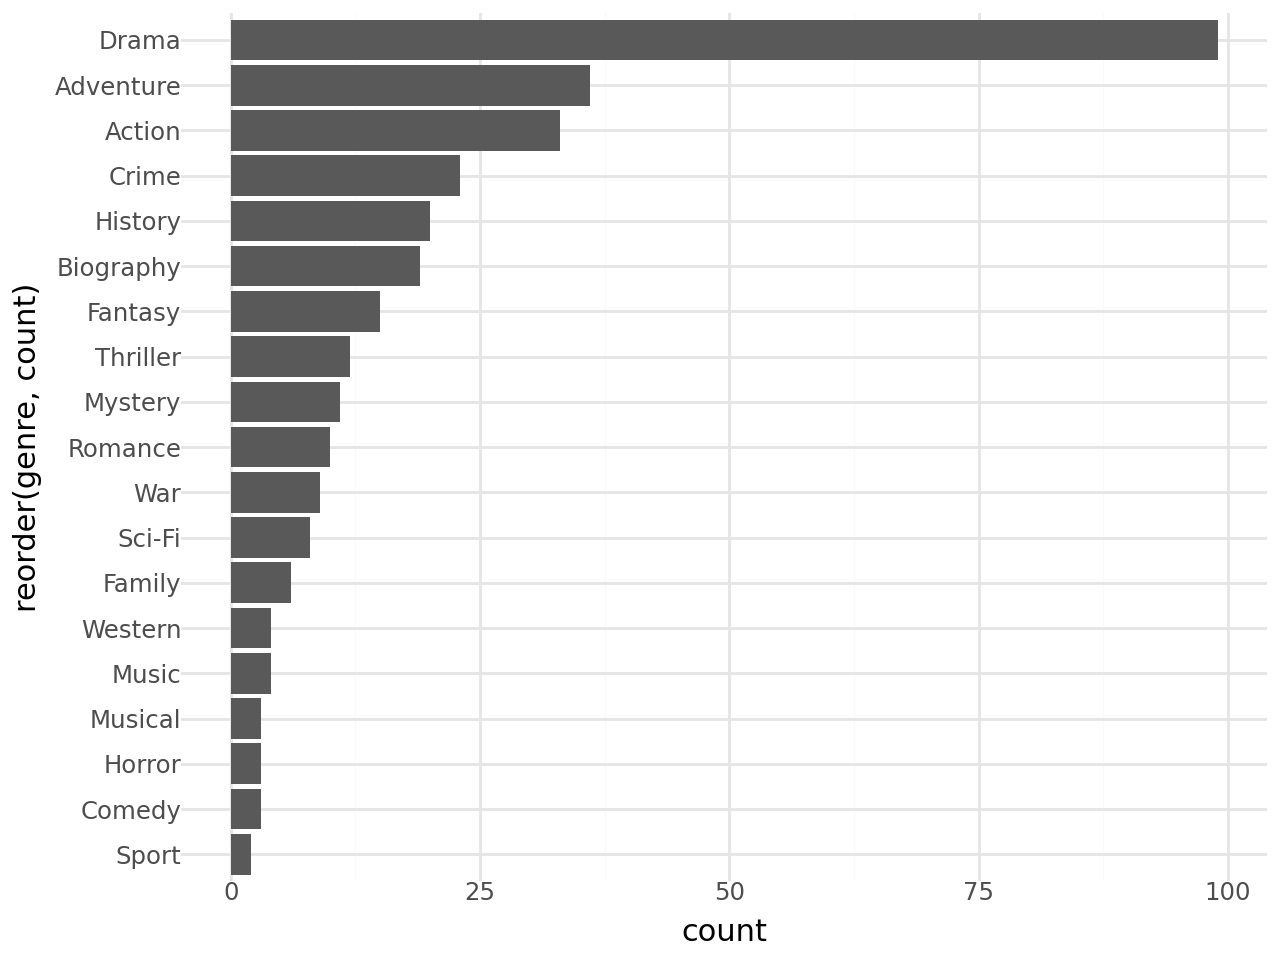

In [19]:
(
    genre
    .join(movie_long, on=[c.year, c.title], how="semi")
    .group_by(c.genre)
    .agg(
        count = pl.len()
    )
    .pipe(ggplot, aes("reorder(genre, count)", "count"))
    + geom_col()
    + coord_flip()
)

We've mentioned that some titles are repeated in the data and therefore we always need to group by title and year. Find all of the titles that are repeated. Print all of the rows of the result and order by the counts.

In [20]:
(
    movie
    .group_by(c.title)
    .agg(count = pl.len())
    .filter(c.count > 1)
    .sort(c.count, descending=True)
    .pipe(print_rows)
)

title,count
str,u32
"""Shaft""",3
"""Hercules""",3
"""Robin Hood""",3
"""Halloween""",3
"""Godzilla""",3
"""The Adventures of Pinocchio""",3
"""Total Recall""",2
"""Poltergeist""",2
"""Les Misérables""",2
